In [1]:
#1: Movie Reviews
import numpy as np
import pandas as pd
movies = pd.read_csv("fandango_score_comparison.csv")
movies

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.30,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.00,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.50,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.20,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.40,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5
5,The Water Diviner (2015),63,62,50,6.8,7.2,4.5,4.0,3.15,3.10,...,3.60,3.0,3.0,2.5,3.5,3.5,34,39373,397,0.5
6,Irrational Man (2015),42,53,53,7.6,6.9,4.0,3.5,2.10,2.65,...,3.45,2.0,2.5,2.5,4.0,3.5,17,2680,252,0.5
7,Top Five (2014),86,64,81,6.8,6.5,4.0,3.5,4.30,3.20,...,3.25,4.5,3.0,4.0,3.5,3.5,124,16876,3223,0.5
8,Shaun the Sheep Movie (2015),99,82,81,8.8,7.4,4.5,4.0,4.95,4.10,...,3.70,5.0,4.0,4.0,4.5,3.5,62,12227,896,0.5
9,Love & Mercy (2015),89,87,80,8.5,7.8,4.5,4.0,4.45,4.35,...,3.90,4.5,4.5,4.0,4.5,4.0,54,5367,864,0.5


In [2]:
#2: Histograms
import matplotlib.pyplot as plt
%matplotlib inline

(array([ 12.,   0.,  27.,   0.,   0.,  41.,   0.,  55.,   0.,  11.]),
 array([ 3. ,  3.2,  3.4,  3.6,  3.8,  4. ,  4.2,  4.4,  4.6,  4.8,  5. ]),
 <a list of 10 Patch objects>)

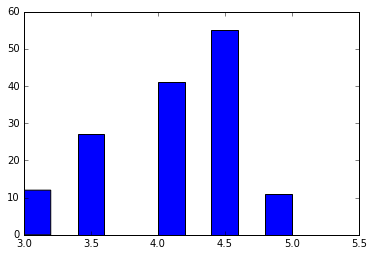

In [3]:
plt.hist(movies["Fandango_Stars"])


(array([  1.,   2.,  20.,  14.,   0.,  22.,  27.,  20.,  25.,  15.]),
 array([ 0.5,  0.9,  1.3,  1.7,  2.1,  2.5,  2.9,  3.3,  3.7,  4.1,  4.5]),
 <a list of 10 Patch objects>)

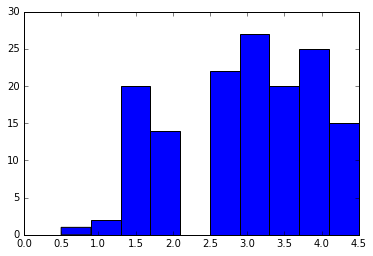

In [4]:
plt.hist(movies["Metacritic_norm_round"])

In [5]:
#3: Mean, Median, And Standard Deviation
mean_fangado = movies["Fandango_Stars"].mean()
mean_metacritic = movies["Metacritic_norm_round"].mean()
print("Mean Fandango_Stars : ",mean_fangado)
print("Mean Metacritic_norm_round : ",mean_metacritic)
print("-------------")
median_fangado = movies["Fandango_Stars"].median()
median_metacritic = movies["Metacritic_norm_round"].median()
print("Median Fandango_Stars : ",median_fangado)
print("Median Metacritic_norm_round : ",median_metacritic)
print("-------------")
std_fangado = np.std(movies["Fandango_Stars"])
std_metacritic = np.std(movies["Metacritic_norm_round"])
print("Std Fandango_Stars : ",std_fangado)
print("Std Metacritic_norm_round : ",std_metacritic)
print("-------------")

Mean Fandango_Stars :  4.08904109589
Mean Metacritic_norm_round :  2.97260273973
-------------
Median Fandango_Stars :  4.0
Median Metacritic_norm_round :  3.0
-------------
Std Fandango_Stars :  0.53853216127
Std Metacritic_norm_round :  0.987561029704
-------------


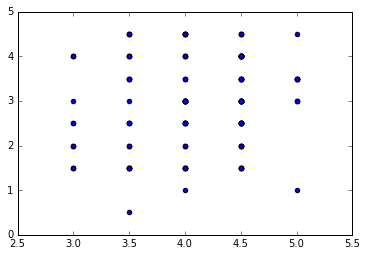

In [6]:
#4: Scatter Plots
plt.scatter(movies["Fandango_Stars"],movies["Metacritic_norm_round"])

In [8]:
movies["fm_diff"] = movies["Metacritic_norm_round"]-movies["Fandango_Stars"]
movies["fm_diff"] = abs(movies["fm_diff"])
movies = movies.sort_values("fm_diff",ascending=False)
print(movies.head())

                        FILM  RottenTomatoes  RottenTomatoes_User  Metacritic  \
3     Do You Believe? (2015)              18                   84          22   
85         Little Boy (2015)              20                   81          30   
47              Annie (2014)              27                   61          33   
19             Pixels (2015)              17                   54          27   
134  The Longest Ride (2015)              31                   73          33   

     Metacritic_User  IMDB  Fandango_Stars  Fandango_Ratingvalue  RT_norm  \
3                4.7   5.4             5.0                   4.5     0.90   
85               5.9   7.4             4.5                   4.3     1.00   
47               4.8   5.2             4.5                   4.2     1.35   
19               5.3   5.6             4.5                   4.1     0.85   
134              4.8   7.2             4.5                   4.5     1.55   

     RT_user_norm   ...     RT_norm_round  RT_user

In [12]:
#5: Correlations
from scipy.stats import pearsonr
from scipy.stats import linregress
y = movies["Fandango_Stars"]
x = movies["Metacritic_norm_round"]
r_value, p_value = pearsonr(x,y)
slope, intercept, r_value, p_value, std_err = linregress(x,y)
pred_3 = 3 * slope + intercept

print("R between Fandango_Stars and Metacritic_norm_round : ",r_value)
print("Slope (x or m) : ",slope)
print("Intercept (b) : ",intercept)
print("Predict for 3 in Metacritic would : ",pred_3)

R between Fandango_Stars and Metacritic_norm_round :  0.178449190739
Slope (x or m) :  0.0973110779739
Intercept (b) :  3.7997739189
Predict for 3 in Metacritic would :  4.09170715282


(1, 5)

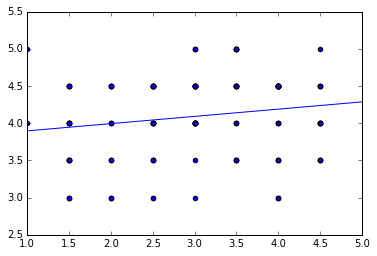

In [17]:
#6: Finding Residuals
pred_1 = 1 * slope + intercept
pred_5 = 5 * slope + intercept
plt.scatter(movies["Metacritic_norm_round"],movies["Fandango_Stars"])
plt.plot([1.0, 5.0],[pred_1,pred_5])
plt.xlim(1,5)